# Analyse Exploratoire

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [7]:
df_customers = pd.read_csv("P5-CSV/olist_customers_dataset.csv")
df_geo = pd.read_csv("P5-CSV/olist_geolocation_dataset.csv")
df_orders = pd.read_csv("P5-CSV/olist_orders_dataset.csv")
df_products = pd.read_csv('P5-CSV/olist_products_dataset.csv')
df_orders_payments = pd.read_csv("P5-CSV/olist_order_payments_dataset.csv")
df_review = pd.read_csv("P5-CSV/olist_order_reviews_dataset.csv")
df_order_items = pd.read_csv("P5-CSV/olist_order_items_dataset.csv")
df_sellers = pd.read_csv("P5-CSV/olist_sellers_dataset.csv")
df_translation = pd.read_csv('P5-CSV/product_category_name_translation.csv')

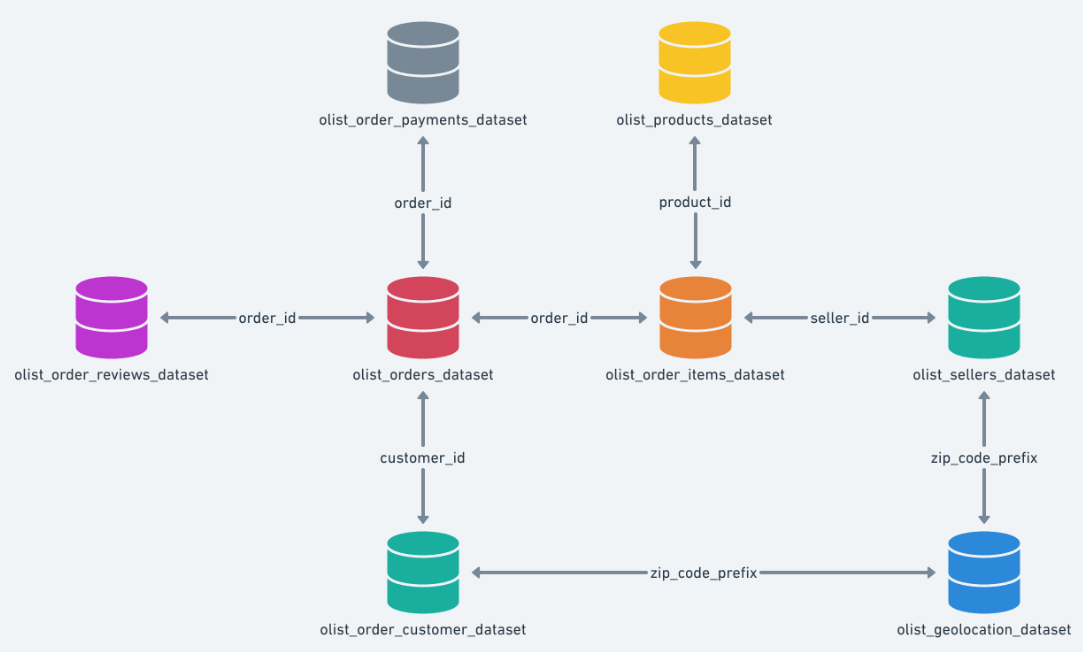

In [8]:
# Clients x Geo

df_customers = pd.merge(df_geo, df_customers,
                        right_on=["customer_zip_code_prefix",
                                  "customer_city", "customer_state"],
                        left_on=["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], how="right")
df_customers.drop(["geolocation_zip_code_prefix",
                   "geolocation_city", "geolocation_state"], axis=1, inplace=True)
df_customers = df_customers[['customer_id', "customer_unique_id", "customer_zip_code_prefix",
                             "customer_city", "customer_state", "geolocation_lat", "geolocation_lng"]]
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194


In [9]:
df_customers.isnull().mean()

customer_id                 0.000000
customer_unique_id          0.000000
customer_zip_code_prefix    0.000000
customer_city               0.000000
customer_state              0.000000
geolocation_lat             0.000023
geolocation_lng             0.000023
dtype: float64

In [10]:
df_customers.shape

(14129681, 7)

In [11]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194
...,...,...,...,...,...,...,...
14129676,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821866,-49.244027
14129677,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.821866,-49.244027
14129678,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.822945,-49.244615
14129679,6fb4f2354f36e554ac80141e9128f528,3cc6f2e1b9199837fabb35ff4bf24884,99043,passo fundo,RS,-28.226596,-52.467505


In [12]:
df_customers.drop_duplicates(subset=['customer_id'], inplace=True)

In [13]:
df_customers.shape

(99441, 7)

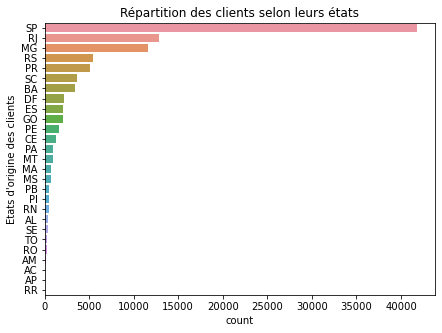

In [14]:
plt.figure(figsize=(7, 5))
sns.countplot(y="customer_state", data=df_customers,
              order=df_customers["customer_state"].value_counts().index)
plt.title("Répartition des clients selon leurs états")
plt.ylabel("Etats d'origine des clients")
plt.show()

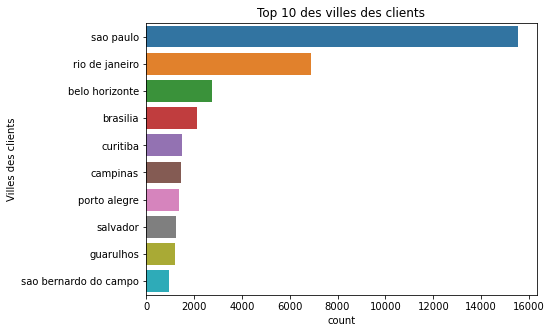

In [15]:
plt.figure(figsize=(7, 5))
sns.countplot(y="customer_city", data=df_customers,
              order=df_customers["customer_city"].value_counts().index[:10])
plt.title("Top 10 des villes des clients")
plt.ylabel("Villes des clients")
plt.show()

In [16]:
# Produits x traduction des catégories

df_products = pd.merge(df_products, df_translation, on="product_category_name")
df_products.drop("product_category_name", axis=1, inplace=True)
df_products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [17]:
df_products.isnull().mean()

product_id                       0.000000
product_name_lenght              0.000000
product_description_lenght       0.000000
product_photos_qty               0.000000
product_weight_g                 0.000031
product_length_cm                0.000031
product_height_cm                0.000031
product_width_cm                 0.000031
product_category_name_english    0.000000
dtype: float64

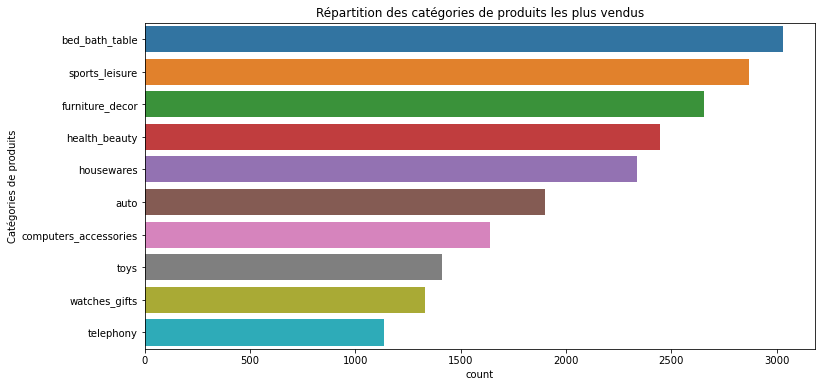

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(y="product_category_name_english", data=df_products,
              order=df_products["product_category_name_english"].value_counts().index[:10])
plt.ylabel("Catégories de produits")
plt.title("Répartition des catégories de produits les plus vendus")
plt.show()

In [19]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32328.000000,32328.000000,32328.000000,32327.000000,32327.000000,32327.000000,32327.000000
mean,48.474078,771.520168,2.188815,2276.960807,30.856498,16.955950,23.208464
std,10.246388,635.180062,1.736746,4279.734063,16.958460,13.637246,12.080665
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,20.500000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [20]:
df_sellers = pd.merge(df_geo, df_sellers,
                      right_on=["seller_zip_code_prefix",
                                "seller_city", "seller_state"],
                      left_on=["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], how="right")
df_sellers.drop(["geolocation_zip_code_prefix", "geolocation_city",
                 "geolocation_state"], axis=1, inplace=True)
df_sellers = df_sellers[['seller_id', "seller_zip_code_prefix",
                         "seller_city", "seller_state", "geolocation_lat", "geolocation_lng"]]
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891740,-47.060820
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895762,-47.066144
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.896154,-47.062431


In [21]:
df_sellers.shape

(385721, 6)

In [22]:
df_sellers.isnull().mean()

seller_id                 0.000000
seller_zip_code_prefix    0.000000
seller_city               0.000000
seller_state              0.000000
geolocation_lat           0.000355
geolocation_lng           0.000355
dtype: float64

In [23]:
df_sellers.drop_duplicates(subset="seller_id", inplace=True)

In [24]:
df_sellers.shape

(3095, 6)

In [25]:
# Orders merge

df_orders = pd.merge(df_orders, df_orders_payments, on="order_id", how="left")
df_orders = pd.merge(df_orders, df_review, on="order_id", how="left")
df_orders = pd.merge(df_orders, df_order_items, on="order_id", how="left")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [26]:
# Recherche de données manquantes et dupliquées
df_orders.isnull().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001486
order_delivered_carrier_date     0.017508
order_delivered_customer_date    0.028713
order_estimated_delivery_date    0.000000
payment_sequential               0.000025
payment_type                     0.000025
payment_installments             0.000025
payment_value                    0.000025
review_id                        0.008368
review_score                     0.008368
review_comment_title             0.882586
review_comment_message           0.578280
review_creation_date             0.008368
review_answer_timestamp          0.008368
order_item_id                    0.006992
product_id                       0.006992
seller_id                        0.006992
shipping_limit_date              0.006992
price                            0.006992
freight_value                    0

In [27]:
df_orders.shape

(119143, 24)

In [28]:
df_orders["order_id"].nunique()

99441

In [29]:
df_orders.drop_duplicates(subset="order_id", keep="last", inplace=True)

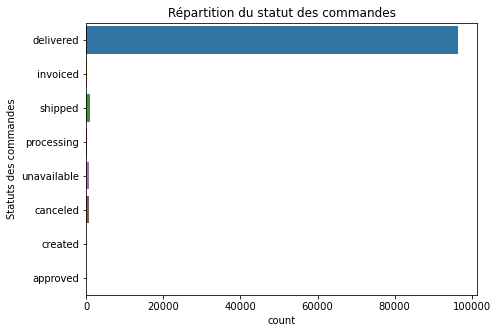

In [30]:
plt.figure(figsize=(7, 5))
sns.countplot(y="order_status", data=df_orders)
plt.title("Répartition du statut des commandes")
plt.ylabel("Statuts des commandes")
plt.show()

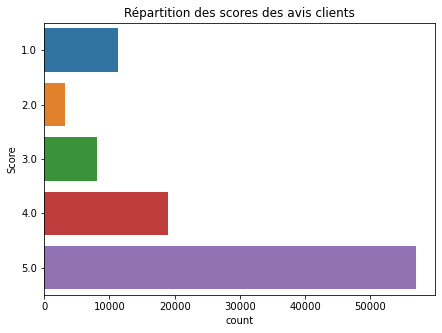

In [31]:
plt.figure(figsize=(7, 5))
sns.countplot(y="review_score", data=df_orders)
plt.title("Répartition des scores des avis clients")
plt.ylabel("Score")
plt.show()

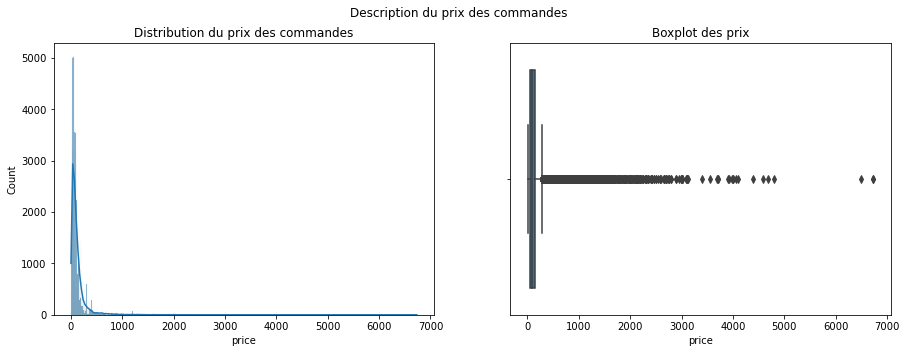

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description du prix des commandes')

sns.histplot(ax=axes[0], x="price", data=df_orders, kde=True)
axes[0].set_title("Distribution du prix des commandes")

sns.boxplot(ax=axes[1], x="price", data=df_orders)
axes[1].set_title("Boxplot des prix")

plt.show()

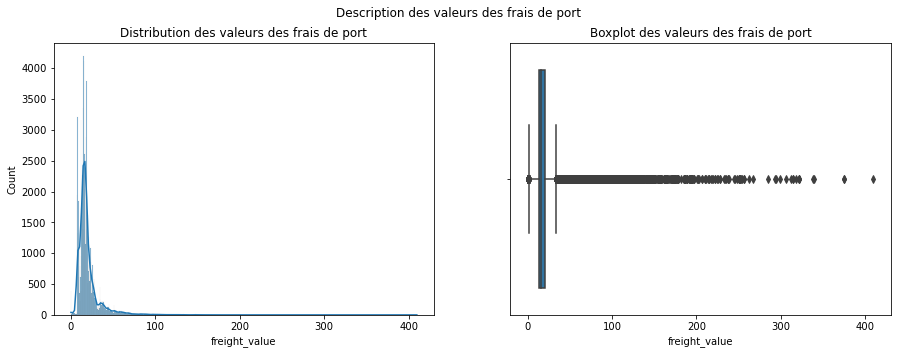

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description des valeurs des frais de port')

sns.histplot(ax=axes[0], x="freight_value", data=df_orders, kde=True)
axes[0].set_title("Distribution des valeurs des frais de port")

sns.boxplot(ax=axes[1], x="freight_value", data=df_orders)
axes[1].set_title("Boxplot des valeurs des frais de port")

plt.show()

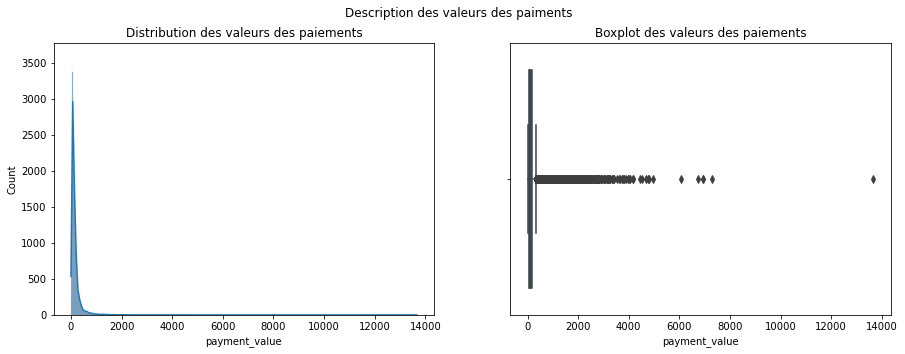

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description des valeurs des paiments')

sns.histplot(ax=axes[0], x="payment_value", data=df_orders, kde=True)
axes[0].set_title("Distribution des valeurs des paiements")

sns.boxplot(ax=axes[1], x="payment_value", data=df_orders)
axes[1].set_title("Boxplot des valeurs des paiements")

plt.show()

In [35]:
# Produits x Ventes
df_prod_orders = pd.merge(df_products, df_orders, on="product_id", how="left")
df_prod_orders.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,...,5.0,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,5fa78e91b5cb84b6a8ccc42733f95742,...,2.0,NaN,NaN,2017-12-14 00:00:00,2017-12-17 02:57:05,1.0,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78
2,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,048cc42e03ca8d43c729adf6962cb348,...,5.0,NaN,O produto que chegou é mais bonito do que eu e...,2017-11-24 00:00:00,2017-11-24 18:34:45,1.0,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78
3,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,a84a0bd528e053f6b266e21bb1111e3f,...,5.0,Muito bom !!,Recomendo tanto o site lannister quanto a loja...,2018-07-11 00:00:00,2018-07-11 10:06:10,1.0,620c87c171fb2a6dd6e8bb4dec959fc6,2018-07-09 20:31:35,319.90,15.45
4,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,...,5.0,NaN,ótimo produto e ótima loja para comprar pelo s...,2017-08-09 00:00:00,2017-08-09 19:30:09,1.0,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13


In [36]:
df_prod_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98289 entries, 0 to 98288
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     98289 non-null  object 
 1   product_name_lenght            98289 non-null  float64
 2   product_description_lenght     98289 non-null  float64
 3   product_photos_qty             98289 non-null  float64
 4   product_weight_g               98288 non-null  float64
 5   product_length_cm              98288 non-null  float64
 6   product_height_cm              98288 non-null  float64
 7   product_width_cm               98288 non-null  float64
 8   product_category_name_english  98289 non-null  object 
 9   order_id                       97226 non-null  object 
 10  customer_id                    97226 non-null  object 
 11  order_status                   97226 non-null  object 
 12  order_purchase_timestamp       97226 non-null 

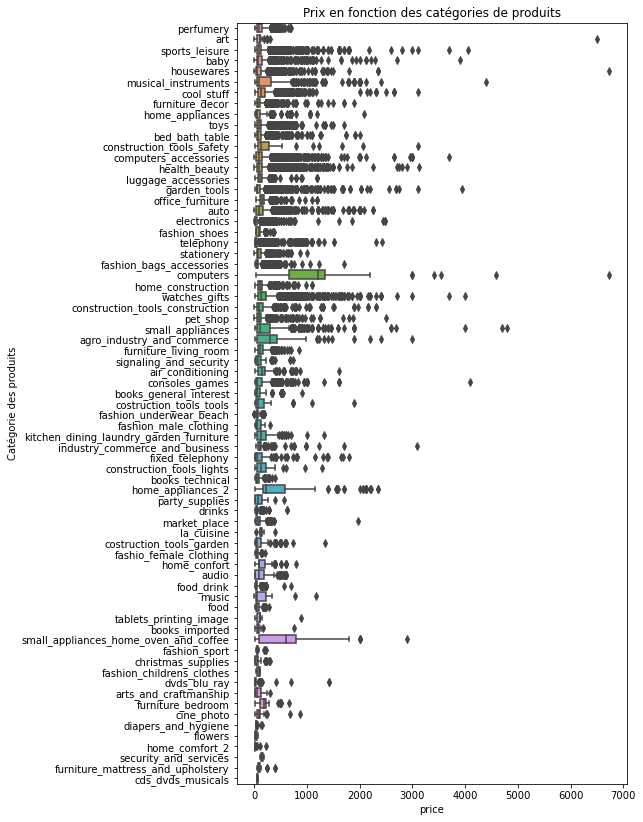

In [37]:
plt.figure(figsize=(7, 14))
sns.boxplot(x="price", y="product_category_name_english", data=df_prod_orders)
plt.ylabel("Catégorie des produits")
plt.title("Prix en fonction des catégories de produits")
plt.show()

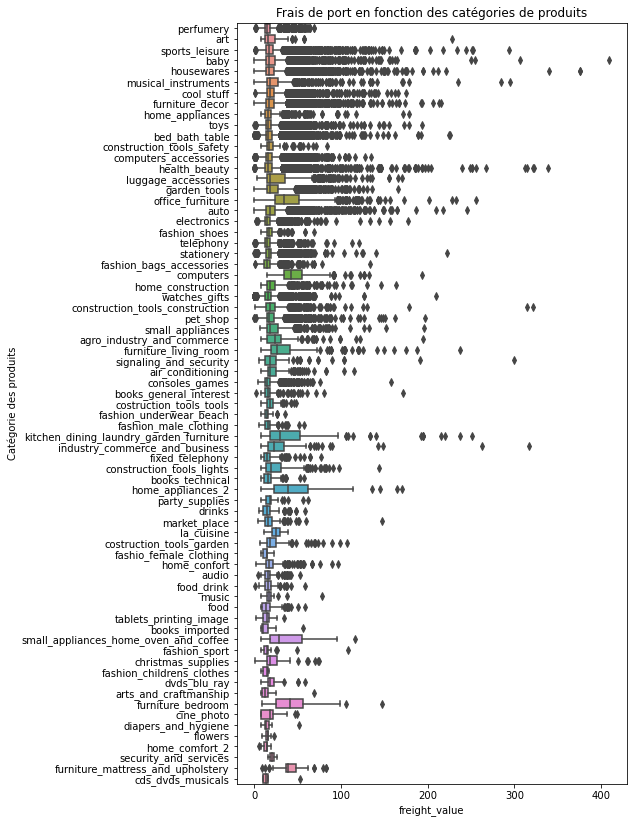

In [38]:
plt.figure(figsize=(7, 14))
sns.boxplot(x="freight_value", y="product_category_name_english",
            data=df_prod_orders)
plt.ylabel("Catégorie des produits")
plt.title("Frais de port en fonction des catégories de produits")
plt.show()

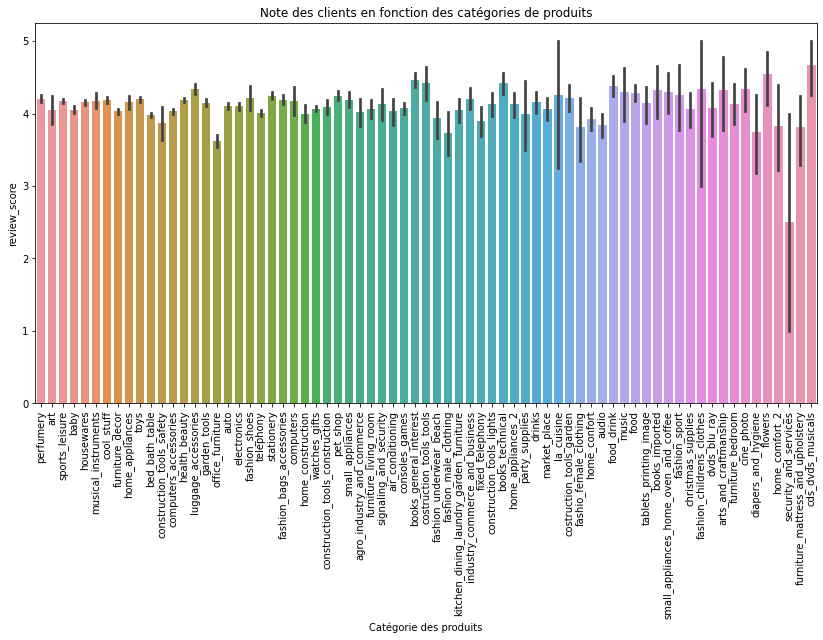

In [39]:
plt.figure(figsize=(14, 7))
sns.barplot(x="product_category_name_english",
            y="review_score", data=df_prod_orders)
plt.xlabel("Catégorie des produits")
plt.xticks(rotation=90)
plt.title("Note des clients en fonction des catégories de produits")
plt.show()

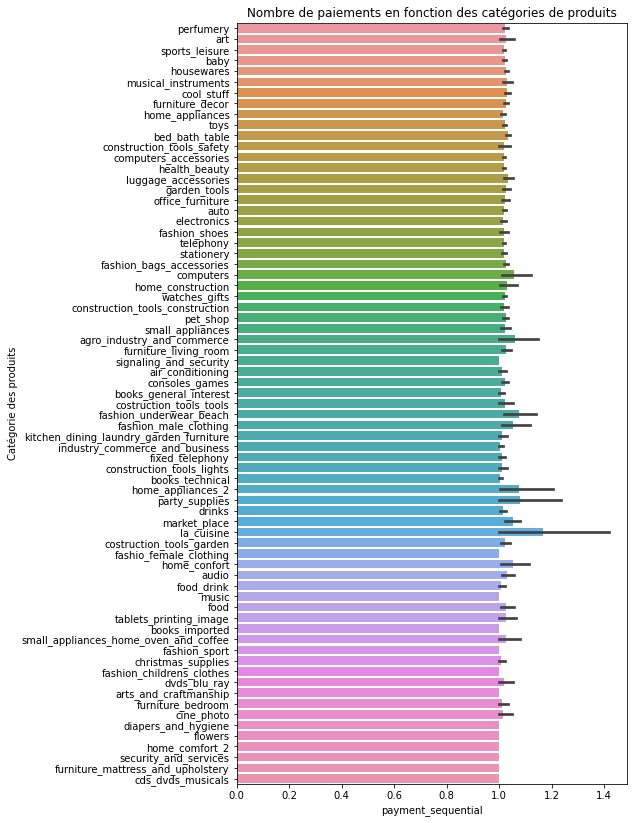

In [40]:
plt.figure(figsize=(7, 14))
sns.barplot(x="payment_sequential",
            y="product_category_name_english", data=df_prod_orders)
plt.ylabel("Catégorie des produits")
plt.title("Nombre de paiements en fonction des catégories de produits")
plt.show()

# Mise en forme pour modélisation

In [41]:
df_prod_orders.columns

Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_id', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [42]:
df_customers = pd.read_csv("P5-CSV/olist_customers_dataset.csv")
df_orders = pd.read_csv("P5-CSV/olist_orders_dataset.csv")

In [43]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [44]:
df_temp = pd.merge(df_customers, df_orders, on="customer_id", how="right")
df_temp.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [45]:
other = df_prod_orders[['order_id', 'review_score',
                        'payment_type', 'payment_value']]
other

,order_id,review_score,payment_type,payment_value
0,e17e4f88e31525f7deef66779844ddce,5.0,debit_card,18.30
1,5fa78e91b5cb84b6a8ccc42733f95742,2.0,voucher,24.68
2,048cc42e03ca8d43c729adf6962cb348,5.0,credit_card,24.68
3,a84a0bd528e053f6b266e21bb1111e3f,5.0,credit_card,335.35
4,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,5.0,credit_card,356.13
...,...,...,...,...
98284,742a36775534b588ed2a62ba4c2d9cd7,4.0,boleto,54.94
98285,d4e8d3bb5e3673ed68ac154fe86de946,5.0,credit_card,61.11
98286,9c782cb7854e5dfa91927cfca8949eb8,5.0,credit_card,61.11
98287,615ca9b2afeaf5644ae8cef64797132e,5.0,boleto,122.22


In [46]:
df = df_temp.set_index('order_id').join(other.set_index('order_id'))
df.reset_index()

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,5.0,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,4.0,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,5.0,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,4.0,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,5.0,credit_card,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,5.0,boleto,343.40
99437,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,5.0,boleto,386.53
99438,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,5.0,credit_card,116.85
99439,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,5.0,credit_card,64.71


In [47]:
time = ["order_purchase_timestamp", "order_approved_at",
        "order_delivered_carrier_date", "order_delivered_customer_date",
        "order_estimated_delivery_date"]

for cols in time:
    df[cols] = pd.to_datetime(df[cols], format="%Y-%m-%d", errors="ignore")

In [48]:
snapshot_date = max(df.order_approved_at) + datetime.timedelta(days=1)

In [49]:
snapshot_date

Timestamp('2018-09-04 17:40:06')

In [50]:
df["ExtraWait"] = df.order_delivered_customer_date - \
    df.order_estimated_delivery_date

In [51]:
df["payment_type"].value_counts()

credit_card    73637
boleto         19339
voucher         2758
debit_card      1491
Name: payment_type, dtype: int64

In [52]:
df.dropna()
df.reset_index()

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_type,payment_value,ExtraWait
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,5.0,credit_card,72.19,-9 days +23:43:48
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,4.0,credit_card,259.83,-3 days +16:04:24
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,5.0,credit_card,216.87,-14 days +13:19:16
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4.0,credit_card,25.78,-6 days +13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,5.0,credit_card,218.04,-16 days +16:42:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,5.0,boleto,343.40,-8 days +22:56:40
99437,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,5.0,boleto,386.53,-9 days +20:31:55
99438,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,5.0,credit_card,116.85,-13 days +12:22:22
99439,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,5.0,credit_card,64.71,-9 days +21:59:40


In [53]:
df["payment_type"].value_counts()

credit_card    73637
boleto         19339
voucher         2758
debit_card      1491
Name: payment_type, dtype: int64

In [54]:
df["payment_type"]

order_id
00010242fe8c5a6d1ba2dd792cb16214    credit_card
00018f77f2f0320c557190d7a144bdd3    credit_card
000229ec398224ef6ca0657da4fc703e    credit_card
00024acbcdf0a6daa1e931b038114c75    credit_card
00042b26cf59d7ce69dfabb4e55b4fd9    credit_card
                                       ...     
fffc94f6ce00a00581880bf54a75a037         boleto
fffcd46ef2263f404302a634eb57f7eb         boleto
fffce4705a9662cd70adb13d4a31832d    credit_card
fffe18544ffabc95dfada21779c9644f    credit_card
fffe41c64501cc87c801fd61db3f6244    credit_card
Name: payment_type, Length: 99441, dtype: object

In [55]:
df["payment_type"] = df["payment_type"].fillna(value="NA")

In [56]:
df["payment_type"].value_counts(dropna=False)

credit_card    73637
boleto         19339
voucher         2758
NA              2216
debit_card      1491
Name: payment_type, dtype: int64

In [57]:
df = df.reset_index()

In [58]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

raw_encoding = encoder.fit_transform(df[["payment_type"]]).todense()

In [59]:
pd.DataFrame(raw_encoding, columns=encoder.categories_)

pd.concat([df, pd.DataFrame(raw_encoding, columns=encoder.categories_)], axis=1)

,order_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,review_score,payment_type,payment_value,ExtraWait,"(NA,)","(boleto,)","(credit_card,)","(debit_card,)","(voucher,)"
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,...,2017-09-29,5.0,credit_card,72.19,-9 days +23:43:48,0.0,0.0,1.0,0.0,0.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,...,2017-05-15,4.0,credit_card,259.83,-3 days +16:04:24,0.0,0.0,1.0,0.0,0.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,...,2018-02-05,5.0,credit_card,216.87,-14 days +13:19:16,0.0,0.0,1.0,0.0,0.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,...,2018-08-20,4.0,credit_card,25.78,-6 days +13:32:39,0.0,0.0,1.0,0.0,0.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,...,2017-03-17,5.0,credit_card,218.04,-16 days +16:42:31,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,...,2018-05-18,5.0,boleto,343.40,-8 days +22:56:40,0.0,1.0,0.0,0.0,0.0
99437,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,...,2018-08-01,5.0,boleto,386.53,-9 days +20:31:55,0.0,1.0,0.0,0.0,0.0
99438,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,...,2017-11-10,5.0,credit_card,116.85,-13 days +12:22:22,0.0,0.0,1.0,0.0,0.0
99439,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,...,2017-08-25,5.0,credit_card,64.71,-9 days +21:59:40,0.0,0.0,1.0,0.0,0.0


In [60]:
df = pd.concat(
    [df, pd.get_dummies(df.payment_type, prefix="payment_type")], axis=1)

In [61]:
df = df[set(df.columns)]

In [62]:
raw_encoding

matrix([[0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]])

In [63]:
df2 = df

In [64]:
df = df2.copy().reset_index()

for key, value in payments.items():
    df["payment_type"].loc[df["payment_type"].str.contains(key, case=False,na=False, regex=False )] = value

In [65]:
df["payment_type"]

0        credit_card
1        credit_card
2        credit_card
3        credit_card
4        credit_card
            ...     
99436         boleto
99437         boleto
99438    credit_card
99439    credit_card
99440    credit_card
Name: payment_type, Length: 99441, dtype: object

In [66]:
df["payment_type"].value_counts()

credit_card    73637
boleto         19339
voucher         2758
NA              2216
debit_card      1491
Name: payment_type, dtype: int64

In [67]:
snapshot_date = max(df.order_purchase_timestamp) + datetime.timedelta(days=1)

In [68]:
df.columns

Index(['index', 'review_score', 'payment_value', 'order_id', 'customer_city',
       'order_delivered_carrier_date', 'customer_unique_id',
       'payment_type_boleto', 'payment_type', 'customer_id',
       'order_approved_at', 'payment_type_voucher', 'ExtraWait',
       'payment_type_debit_card', 'order_status',
       'order_delivered_customer_date', 'payment_type_NA',
       'order_purchase_timestamp', 'customer_zip_code_prefix',
       'order_estimated_delivery_date', 'customer_state',
       'payment_type_credit_card'],
      dtype='object')

In [69]:
df = df.drop(
    columns=[col for col in df.columns if col.startswith("payment_type_")])
df = pd.concat(
    [df, pd.get_dummies(df.payment_type, prefix="payment_type")], axis=1)
df

,index,review_score,payment_value,order_id,customer_city,order_delivered_carrier_date,customer_unique_id,payment_type,customer_id,order_approved_at,...,order_delivered_customer_date,order_purchase_timestamp,customer_zip_code_prefix,order_estimated_delivery_date,customer_state,payment_type_NA,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0,5.0,72.19,00010242fe8c5a6d1ba2dd792cb16214,campos dos goytacazes,2017-09-19 18:34:16,871766c5855e863f6eccc05f988b23cb,credit_card,3ce436f183e68e07877b285a838db11a,2017-09-13 09:45:35,...,2017-09-20 23:43:48,2017-09-13 08:59:02,28013,2017-09-29,RJ,0,0,1,0,0
1,1,4.0,259.83,00018f77f2f0320c557190d7a144bdd3,santa fe do sul,2017-05-04 14:35:00,eb28e67c4c0b83846050ddfb8a35d051,credit_card,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 11:05:13,...,2017-05-12 16:04:24,2017-04-26 10:53:06,15775,2017-05-15,SP,0,0,1,0,0
2,2,5.0,216.87,000229ec398224ef6ca0657da4fc703e,para de minas,2018-01-16 12:36:48,3818d81c6709e39d06b2738a8d3a2474,credit_card,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:48:30,...,2018-01-22 13:19:16,2018-01-14 14:33:31,35661,2018-02-05,MG,0,0,1,0,0
3,3,4.0,25.78,00024acbcdf0a6daa1e931b038114c75,atibaia,2018-08-10 13:28:00,af861d436cfc08b2c2ddefd0ba074622,credit_card,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:10:18,...,2018-08-14 13:32:39,2018-08-08 10:00:35,12952,2018-08-20,SP,0,0,1,0,0
4,4,5.0,218.04,00042b26cf59d7ce69dfabb4e55b4fd9,varzea paulista,2017-02-16 09:46:09,64b576fb70d441e8f1b2d7d446e483c5,credit_card,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 14:10:13,...,2017-03-01 16:42:31,2017-02-04 13:57:51,13226,2017-03-17,SP,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,99436,5.0,343.40,fffc94f6ce00a00581880bf54a75a037,sao luis,2018-04-25 12:09:00,0c9aeda10a71f369396d0c04dce13a64,boleto,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-25 04:11:01,...,2018-05-10 22:56:40,2018-04-23 13:57:06,65077,2018-05-18,MA,0,1,0,0,0
99437,99437,5.0,386.53,fffcd46ef2263f404302a634eb57f7eb,curitiba,2018-07-17 08:05:00,0da9fe112eae0c74d3ba1fe16de0988b,boleto,84c5d4fbaf120aae381fad077416eaa0,2018-07-17 04:31:48,...,2018-07-23 20:31:55,2018-07-14 10:26:46,81690,2018-08-01,PR,0,1,0,0,0
99438,99438,5.0,116.85,fffce4705a9662cd70adb13d4a31832d,sao paulo,2017-10-26 15:13:14,cd79b407828f02fdbba457111c38e4c4,credit_card,29309aa813182aaddc9b259e31b870e6,2017-10-24 17:14:25,...,2017-10-28 12:22:22,2017-10-23 17:07:56,4039,2017-11-10,SP,0,0,1,0,0
99439,99439,5.0,64.71,fffe18544ffabc95dfada21779c9644f,vinhedo,2017-08-15 19:02:53,eb803377c9315b564bdedad672039306,credit_card,b5e6afd5a41800fdf401e0272ca74655,2017-08-15 00:04:32,...,2017-08-16 21:59:40,2017-08-14 23:02:59,13289,2017-08-25,SP,0,0,1,0,0


In [70]:
df = df.drop(columns=['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_status',
                      'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

In [71]:
df = df.dropna()

In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94458 entries, 0 to 99440
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   index                     94458 non-null  int64          
 1   review_score              94458 non-null  float64        
 2   payment_value             94458 non-null  float64        
 3   order_id                  94458 non-null  object         
 4   customer_unique_id        94458 non-null  object         
 5   payment_type              94458 non-null  object         
 6   ExtraWait                 94458 non-null  timedelta64[ns]
 7   order_purchase_timestamp  94458 non-null  datetime64[ns] 
 8   payment_type_NA           94458 non-null  uint8          
 9   payment_type_boleto       94458 non-null  uint8          
 10  payment_type_credit_card  94458 non-null  uint8          
 11  payment_type_debit_card   94458 non-null  uint8          
 12  paym

In [73]:
df["ExtraWait"] = df["ExtraWait"].astype('int64')/10**9/3600/24

In [74]:
df["ExtraWait"]

0        -8.011250
1        -2.330278
2       -13.444954
3        -5.435660
4       -15.303808
           ...    
99436    -7.043981
99437    -8.144502
99438   -12.484468
99439    -8.083565
99440   -13.252477
Name: ExtraWait, Length: 94458, dtype: float64

In [75]:
snapshot_date

Timestamp('2018-10-18 17:30:18')

In [76]:
df = df.dropna()

# Création et mise en place de nouvelles features

In [296]:
rfm_custom2 = df.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (snapshot_date - x.max()).days,
    "order_id": 'count',
    "payment_value": 'mean',
    "review_score": 'mean',
    "ExtraWait": 'mean'
})

rfm_custom2.columns = ["Recency", "Frequency",
                       "MonetaryValue", "Review", "ExtraWait"]
data1 = rfm_custom2.copy().reset_index()
data1

,customer_unique_id,Recency,Frequency,MonetaryValue,Review,ExtraWait
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,5.0,-4.132905
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,4.0,-4.248125
2,0000f46a3911fa3c0805444483337064,586,1,86.22,3.0,-1.389734
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,4.0,-11.108970
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89,5.0,-7.035463
...,...,...,...,...,...,...
91448,fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42,5.0,-26.609722
91449,fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58,4.0,-2.063657
91450,ffff371b4d645b6ecea244b27531430a,618,1,112.46,5.0,-29.468704
91451,ffff5962728ec6157033ef9805bacc48,169,1,133.69,5.0,-13.503866


In [320]:
data2 = data1.copy()
data2["Recency"] = np.log(data1['Recency'])
data2["Frequency"] = np.log(data1["Frequency"])
data2["MonetaryValue"] = np.log1p(data1["MonetaryValue"])
data2.set_index("customer_unique_id", inplace=True)
data2

,Recency,Frequency,MonetaryValue,Review,ExtraWait
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,5.081404,0.0,4.962145,5.0,-4.132905
0000b849f77a49e4a4ce2b2a4ca5be3f,5.099866,0.0,3.338967,4.0,-4.248125
0000f46a3911fa3c0805444483337064,6.373320,0.0,4.468434,3.0,-1.389734
0000f6ccb0745a6a4b88665a16c9f078,5.913503,0.0,3.798182,4.0,-11.108970
0004aac84e0df4da2b147fca70cf8255,5.820083,0.0,5.287711,5.0,-7.035463
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,6.206576,0.0,7.634540,5.0,-26.609722
fffea47cd6d3cc0a88bd621562a9d061,5.739793,0.0,4.449452,4.0,-2.063657
ffff371b4d645b6ecea244b27531430a,6.426488,0.0,4.731450,5.0,-29.468704


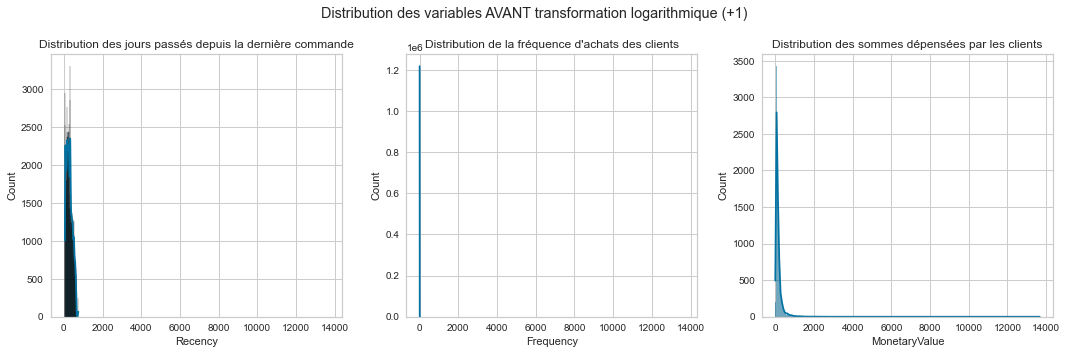

In [341]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
fig.suptitle('Distribution des variables AVANT transformation logarithmique (+1)')

sns.histplot(ax=axes[0], x="Recency", data=data1, kde=True)
axes[0].set_title("Distribution des jours passés depuis la dernière commande")

sns.histplot(ax=axes[1], x="Frequency", data=data1, kde=True)
axes[1].set_title("Distribution de la fréquence d'achats des clients")

sns.histplot(ax=axes[2], x="MonetaryValue", data=data1, kde=True)
axes[2].set_title("Distribution des sommes dépensées par les clients")

plt.tight_layout()
plt.show()

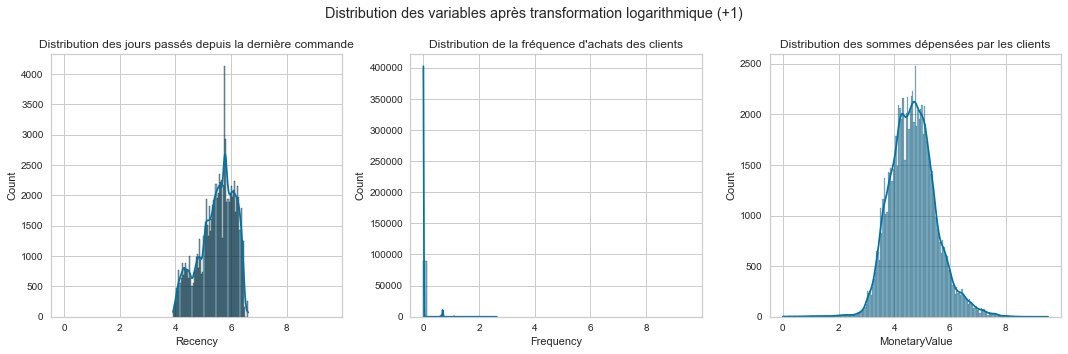

In [342]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
fig.suptitle('Distribution des variables après transformation logarithmique (+1)')

sns.histplot(ax=axes[0], x="Recency", data=data2, kde=True)
axes[0].set_title("Distribution des jours passés depuis la dernière commande")

sns.histplot(ax=axes[1], x="Frequency", data=data2, kde=True)
axes[1].set_title("Distribution de la fréquence d'achats des clients")

sns.histplot(ax=axes[2], x="MonetaryValue", data=data2, kde=True)
axes[2].set_title("Distribution des sommes dépensées par les clients")

plt.tight_layout()
plt.show()

In [327]:
rfm4 = data2.copy()
rfm4.describe()

,Recency,Frequency,MonetaryValue,Review,ExtraWait
count,91453.000000,91453.000000,91453.000000,91453.000000,91453.000000
mean,5.488090,0.021676,4.676398,4.155196,-11.196941
std,0.619970,0.126747,0.830338,1.279005,10.073458
min,3.912023,0.000000,0.000000,1.000000,-146.016123
25%,5.093750,0.000000,4.120824,4.000000,-16.236858
50%,5.587249,0.000000,4.648230,5.000000,-11.926435
75%,5.978886,0.000000,5.169973,5.000000,-6.414977
max,6.613384,2.639057,9.522599,5.000000,188.975081


In [324]:
from sklearn.preprocessing import StandardScaler

In [325]:
from sklearn.decomposition import PCA

In [328]:
rfm4

,Recency,Frequency,MonetaryValue,Review,ExtraWait
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,5.081404,0.0,4.962145,5.0,-4.132905
0000b849f77a49e4a4ce2b2a4ca5be3f,5.099866,0.0,3.338967,4.0,-4.248125
0000f46a3911fa3c0805444483337064,6.373320,0.0,4.468434,3.0,-1.389734
0000f6ccb0745a6a4b88665a16c9f078,5.913503,0.0,3.798182,4.0,-11.108970
0004aac84e0df4da2b147fca70cf8255,5.820083,0.0,5.287711,5.0,-7.035463
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,6.206576,0.0,7.634540,5.0,-26.609722
fffea47cd6d3cc0a88bd621562a9d061,5.739793,0.0,4.449452,4.0,-2.063657
ffff371b4d645b6ecea244b27531430a,6.426488,0.0,4.731450,5.0,-29.468704


In [329]:
rfm4.dtypes

Recency          float64
Frequency        float64
MonetaryValue    float64
Review           float64
ExtraWait        float64
dtype: object

In [330]:
scaler = StandardScaler()

scaler.fit(rfm4)
rfm_normalized = scaler.transform(rfm4)

print("Mean:", rfm_normalized.mean(axis=0).round(2))
print("Standard Deviation:", rfm_normalized.std(axis=0).round(2))

Mean: [ 0.  0. -0. -0. -0.]
Standard Deviation: [1. 1. 1. 1. 1.]


In [331]:
rfm_normalized

array([[-0.65598041, -0.1710189 ,  0.344135  ,  0.66051976,  0.70125618],
       [-0.62620128, -0.1710189 , -1.61071658, -0.12134217,  0.68981815],
       [ 1.42786654, -0.1710189 , -0.25045948, -0.90320409,  0.97357441],
       ...,
       [ 1.51362708, -0.1710189 ,  0.06630101,  0.66051976, -1.81386198],
       [-0.5777595 , -0.1710189 ,  0.27287535,  0.66051976, -0.22901145],
       [ 1.2749577 , -0.1710189 , -0.47208124,  0.66051976, -0.43724913]])

# Modélisation

In [332]:
n_comp = 2
pca = PCA(n_components=n_comp)
features = rfm4.columns
data_pca = pca.fit_transform(rfm_normalized)
pcs = pca.components_

In [333]:
features

Index(['Recency', 'Frequency', 'MonetaryValue', 'Review', 'ExtraWait'], dtype='object')

In [334]:
n = rfm_normalized.shape[0]
n

91453

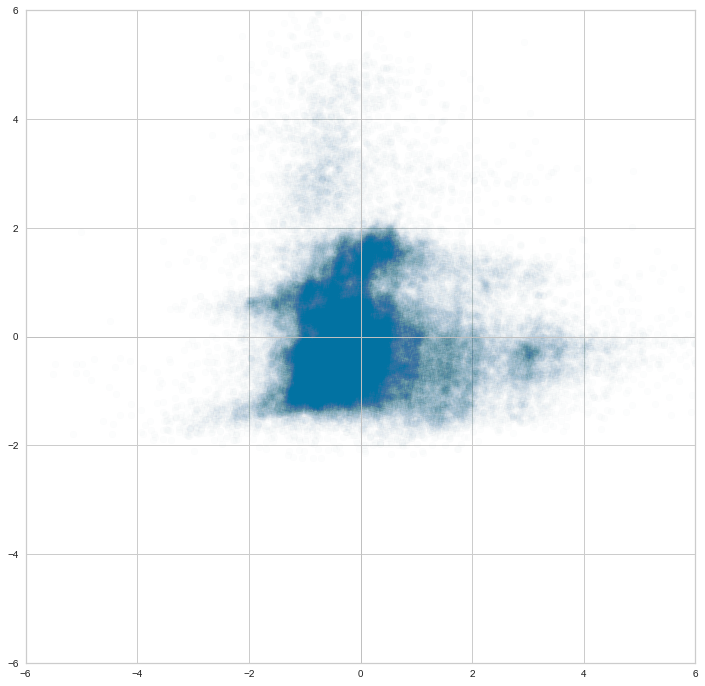

In [335]:
# positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12, 12))
axes.set_xlim(-6, 6)  # même limites en abscisse
axes.set_ylim(-6, 6)  # et en ordonnée
# placement des étiquettes des observations
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.01)
# ajouter les axes
plt.plot([-6, 6], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-6, 6], color='silver', linestyle='-', linewidth=1)
# affichage
plt.show()

# ACP

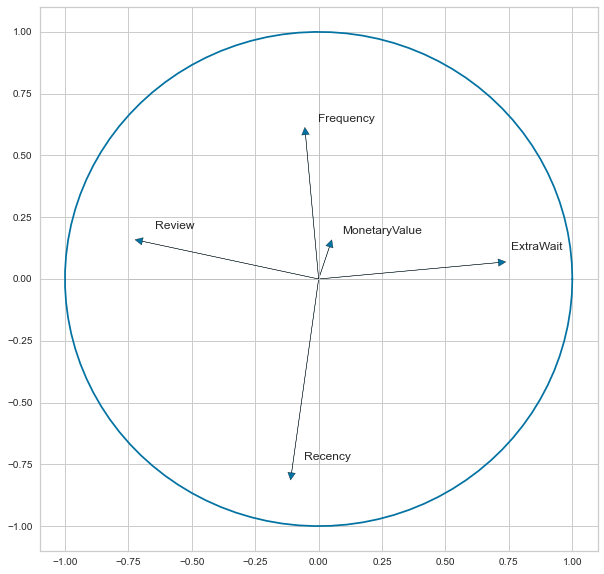

In [336]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(10, 10))
plt.plot([-0.75, 0.75], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-0.75, 0.75], color='silver', linestyle='-', linewidth=1)
for i in range(0, pcs.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  # 0 for PC1
             pca.components_[1, i],  # 1 for PC2
             head_width=0.03,
             head_length=0.03)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             rfm4.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))

## K-Means

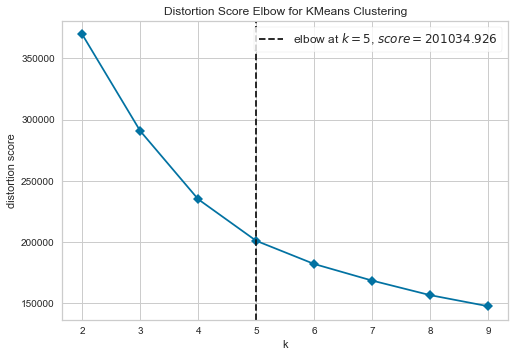

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [337]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

modelK = KMeans()
visualizer = KElbowVisualizer(modelK, k=(2, 10), timings=False)
visualizer.fit(rfm_normalized)
visualizer.show()

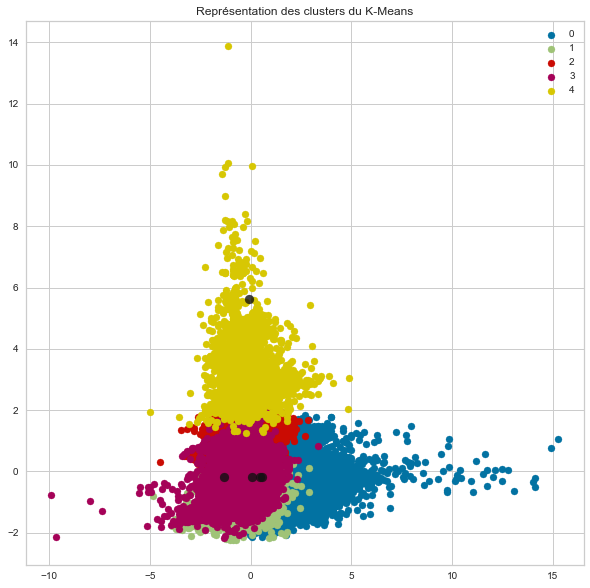

In [338]:
# Fitting des KMeans
km = KMeans(n_clusters=5, random_state=42)

# Prédiction
label = km.fit_predict(rfm_normalized)
centroids = km.cluster_centers_
u_labels = np.unique(label)

# Graph
plt.figure(figsize=(10, 10))
for i in u_labels:
    plt.scatter(data_pca[label == i, 0], data_pca[label == i, 1], label=i)
plt.scatter(centroids[:, 0], centroids[:, 1], s=80, alpha=0.8, color='k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()

## DBScan

In [247]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

Text(0, 0.5, 'Distance')

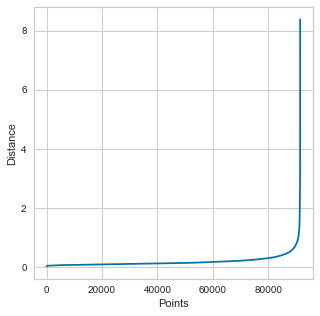

In [248]:
# Recherche d'epsilon pour DBScan

from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(rfm_normalized)

distances, indices = neighbors.kneighbors(rfm_normalized)
distances = np.sort(distances[:, 10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.3236115447818568


<Figure size 360x360 with 0 Axes>

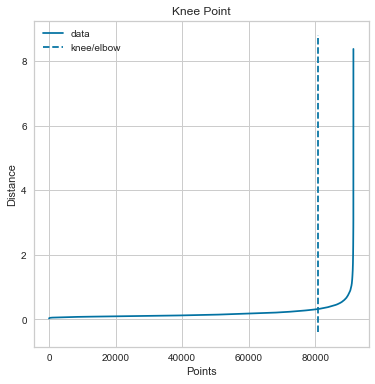

In [249]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex',
                   direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [250]:
X = rfm_normalized

X.shape

(91453, 5)

In [253]:
db = DBSCAN(eps=0.32, min_samples=2000).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [254]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 0
Estimated number of noise points: 91453


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )


plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## DB Scan sans 'noise'

In [ ]:
range_max = len(X)
X = np.array([X[i] for i in range(0, range_max) if labels[i] != -1])
labels = np.array([labels[i] for i in range(0, range_max) if labels[i] != -1])

plt.scatter(X[:, 0], X[:, 1], marker="o", picker=True)
plt.title(f'Noise removed')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [ ]:
X = rfm_normalized

X.shape

In [ ]:
Y = pd.DataFrame(X,
                 columns=["Recency", "Frequency", "MonetaryValue", "Review",
                          "ExtraWait"])

## Dendrogramme

sns.clustermap(Y)

## T-SNE

In [255]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets, decomposition,
                     ensemble, discriminant_analysis, random_projection)
from matplotlib import offsetbox
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

In [256]:
Z = Y.copy()

In [257]:
Z

,Recency,Frequency,MonetaryValue,Review,ExtraWait
0,-0.821027,-0.159356,-0.072571,0.660520,0.701256
1,-0.801370,-0.159356,-0.603032,-0.121342,0.689818
2,1.963608,-0.159356,-0.330056,-0.903204,0.973574
3,0.548359,-0.159356,-0.527054,-0.121342,0.008733
4,0.332140,-0.159356,0.181722,0.660520,0.413115
...,...,...,...,...,...
91448,1.373921,-0.159356,8.831739,0.660520,-1.530047
91449,0.161786,-0.159356,-0.337640,-0.121342,0.906673
91450,2.173275,-0.159356,-0.208713,0.660520,-1.813862
91451,-0.768610,-0.159356,-0.110537,0.660520,-0.229011


In [ ]:
W = Z.values

tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=300, init='pca')
W_tsne = tsne.fit_transform(W)

In [ ]:
km.labels_.shape

In [ ]:
W_tsne.shape

In [ ]:
sns.scatterplot(W_tsne[:, 0], W_tsne[:, 1], hue=km.labels_)
plt.show()

# Maintenance via ARI

In [258]:
def construction(TempsFinal):
    dfcoupe = df[df["order_purchase_timestamp"] <= TempsFinal]

    rfm = dfcoupe.groupby("customer_unique_id").agg({
        "order_purchase_timestamp": lambda x: (TempsFinal - x.max()).days,
        "order_id": 'count',
        "payment_value": 'mean',
        "review_score": 'mean',
        # "payment_type_voucher": 'sum',
        "ExtraWait": 'mean'
    })

    rfm.columns = ["Recency", "Frequency", "MonetaryValue",
                   "Review", "ExtraWait"]
    return rfm

In [259]:
D0 = construction(snapshot_date - pd.Timedelta(0, "D"))

In [260]:
D30 = construction(snapshot_date - pd.Timedelta(30, "D"))

In [261]:
D60 = construction(snapshot_date - pd.Timedelta(60, "D"))

In [262]:
D90 = construction(snapshot_date - pd.Timedelta(90, "D"))

In [263]:
D120 = construction(snapshot_date - pd.Timedelta(120, "D"))

In [264]:
D150 = construction(snapshot_date - pd.Timedelta(150, "D"))

In [265]:
D180 = construction(snapshot_date - pd.Timedelta(180, "D"))

In [266]:
# Fitting des KMeans
kmodel0 = KMeans(n_clusters=5, random_state=42)
kmodel1 = KMeans(n_clusters=5, random_state=42)
kmodel2 = KMeans(n_clusters=5, random_state=42)
kmodel3 = KMeans(n_clusters=5, random_state=42)
kmodel4 = KMeans(n_clusters=5, random_state=42)
kmodel5 = KMeans(n_clusters=5, random_state=42)
kmodel6 = KMeans(n_clusters=5, random_state=42)

scaler0 = StandardScaler()
scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
scaler4 = StandardScaler()
scaler5 = StandardScaler()
scaler6 = StandardScaler()


# 0
D0scale = scaler0.fit_transform(D0)
kmodel0.fit(D0scale)
label0 = kmodel0.predict(scaler0.transform(D0))
u_labels0 = np.unique(label0)

# 30
D30scale = scaler1.fit_transform(D30)
kmodel1.fit(D30scale)
label1 = kmodel1.predict(scaler1.transform(D0))
u_labels1 = np.unique(label1)

# 60
D60scale = scaler2.fit_transform(D60)
kmodel2.fit(D60scale)
label2 = kmodel2.predict(scaler2.transform(D0))
u_labels2 = np.unique(label2)

# 90
D90scale = scaler3.fit_transform(D90)
kmodel3.fit(D90scale)
label3 = kmodel3.predict(scaler3.transform(D0))
u_labels3 = np.unique(label3)

# 120
D120scale = scaler4.fit_transform(D120)
kmodel4.fit(D120scale)
label4 = kmodel4.predict(scaler4.transform(D0))
u_labels4 = np.unique(label4)

# 150
D150scale = scaler5.fit_transform(D150)
kmodel5.fit(D150scale)
label5 = kmodel5.predict(scaler5.transform(D0))
u_labels5 = np.unique(label5)

# 180
D180scale = scaler6.fit_transform(D180)
kmodel6.fit(D180scale)
label6 = kmodel6.predict(scaler6.transform(D0))
u_labels6 = np.unique(label6)

In [267]:
from sklearn.metrics import adjusted_rand_score

In [268]:
ARI = {
    1: adjusted_rand_score(label0, label1),
    2: adjusted_rand_score(label0, label2),
    3: adjusted_rand_score(label0, label3),
    4: adjusted_rand_score(label0, label4),
    5: adjusted_rand_score(label0, label5),
    6: adjusted_rand_score(label0, label6)
}

for i, s in ARI.items():

    print(f'ARI à {i} mois : {s}')

ARI à 1 mois : 0.8425618546423319
ARI à 2 mois : 0.6987932577342801
ARI à 3 mois : 0.7155005483288113
ARI à 4 mois : 0.6381764905793021
ARI à 5 mois : 0.5660315079675533
ARI à 6 mois : 0.5079519022501282


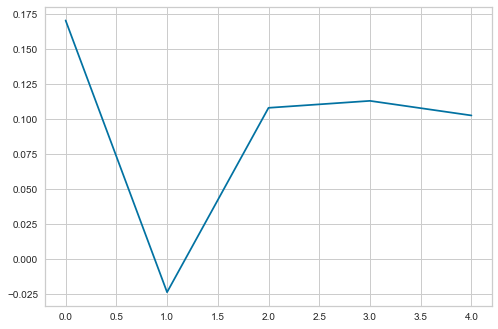

In [269]:
x = np.array(list(ARI.values()))
variation = 1 - x[1:]/x[:-1]

plt.plot(variation)

In [270]:
rfm4["Cluster"] = km.labels_
rfm4["Pourcentage"] = 100/rfm4.shape[0]
data_clusters_analysis = rfm4.groupby('Cluster').agg({
    'Recency': "mean",
    'Frequency': "mean",
    'MonetaryValue': "mean",
    'ExtraWait': "mean",
    "Review": "mean",
    "Pourcentage": "sum"}).round(2)
data_clusters_analysis

,Recency,Frequency,MonetaryValue,ExtraWait,Review,Pourcentage
Cluster,,,,,,
0,5.52,0.00,4.80,-2.47,1.49,14.00
1,5.83,0.00,4.04,-11.96,4.58,32.74
2,4.68,0.00,4.62,-12.36,4.63,24.10
3,5.79,0.00,5.46,-13.75,4.60,26.20
4,5.43,0.73,4.71,-11.96,4.21,2.96
